### ParColor:
Este código captura una imagen con la camara web y toma 25 pixeles del centro, con espaciamiento establecido por "mask". Cada uno de estos pixeles es sonificado espacialmente de izquierda a derecha, dependiendo de su color HSL (no RGB) y por medio de un instrumento+tono establecidos al documento guia (sección: La algoritmia detrás de la sonificación de colores en SeeColor). Los 25 sonidos son combinados para generar el audio final de sonificación que escuchará el usuario. 

Este código debe ser transferido a Unity para generar una aplicación para Microsoft Hololens, que replique este proceso, pero no solo en una imágen o frame, sino continuamente en un flujo de imágenes video en tiempo real, provisto por la cámara del mismo computador holográfico. 

Juan Diego Gomez, PhD

In [ ]:
from scipy.io import wavfile
import IPython.display as ipd
import numpy as np
import colorsys
import cv2
import matplotlib.pyplot as plt

mask=[-15, -12, -9, -7, -5, -3, -3, -2, -2, -1, -1, -1, 0, 1, 1, 1, 2, 2, 3, 3, 5, 7, 9, 12, 15]
mask=list(np.array(mask)+320) # assuming frame size (480,640,3)

In [2]:
def rgb_hsl(R,G,B):
    
    mini=min(R,G,B)
    maxi=max(R,G,B)
        
    H, S, L = ((maxi + mini) / 2,)*3

    if maxi == mini:
        H = 0.0
        S = 0.0
        return H, S, L    

    S = (maxi-mini)/maxi
        
    if R == maxi: 
        H = (G-B)/(maxi-mini)
    if G == maxi:
        H = 2.0 + (B-R)/(maxi-mini)
    if B is maxi:
        H = 4.0 + (R-G)/(maxi-mini)       
        
    H=H*60
    if H<0:
        H+=360
    
    return H, S, L


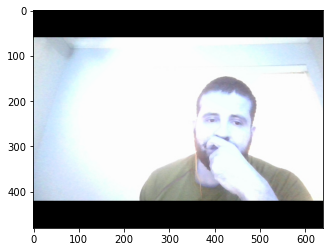

In [7]:
samplerate, sound= wavfile.read('SpatialSounds/oboeSib4_1.wav') #load any sound
sound-=sound

webcam = cv2.VideoCapture(0) # Number which capture webcam in my machine
check, frame = webcam.read()
webcam.release()

pxls=frame[240, mask, :]/255

for pos in range(25):
    
    H,S,L=rgb_hsl(pxls[pos,0], pxls[pos,1], pxls[pos,2])
    
    if 0 <= H  and H < 30:
        name='SpatialSounds/oboe'    
    elif 30 <= H  and H < 60:
        name='SpatialSounds/alto'  
    elif 60 <= H  and H < 120:
        name='SpatialSounds/violin'  
    elif 120 <= H  and H < 180:
        name='SpatialSounds/flute'  
    elif 180 <= H and H < 240:
        name='SpatialSounds/trumpet'  
    elif 240 <= H and H < 300:
        name='SpatialSounds/piano'  
    elif 300 <= H and H <= 360:
        name='SpatialSounds/saxAlto'  

    
    if 0 <= S  and S < 0.25:
        name+='Doo4'
    elif 0.25 <= S  and S < 0.5:
        name+='Sol4'
    elif 0.5 <= S and S < 0.75:
        name+='Sib4'
    elif 0.75 <= S and S <= 1:
        name+='Mii5'

    name+='_'+str(pos+1)

    
    if 0 <= S  and S < 0.125:
        name2='bassDoo3'+'_'+str(pos+1)
    elif 0.125 <= S  and S < 0.25:
        name2='bassSol3'+'_'+str(pos+1)
    elif 0.25 <= S and S < 0.375:
        name2='bassSib3'+'_'+str(pos+1)
    elif 0.375 <= S and S <= 0.5:
        name2='bassMii4'+'_'+str(pos+1)
    if 0.5 <= S  and S < 0.625:
        name2='midi53Doo4'+'_'+str(pos+1)
    elif 0.625 <= S  and S < 0.75:
        name2='midi53Sol4'+'_'+str(pos+1)
    elif 0.75 <= S and S < 0.875:
        name2='midi53Sib4'+'_'+str(pos+1)
    elif 0.875 <= S and S <= 1:
        name2='midi53Mii5'+'_'+str(pos+1)


    samplerate, data1 = wavfile.read(name+'.wav')
    samplerate, data2 = wavfile.read('SpatialSounds/'+name2+'.wav')
    
    if len(data1) > len(data2):
        data1=data1[:len(data2)]
    else:
        data2=data2[:len(data1)]
        
    aux=data1+data2
    
    if len(sound) > len(aux):
        sound=sound[:len(aux)]
    else:
        aux=aux[:len(sound)]

    sound+=aux
    
wavfile.write('parcolor.wav', samplerate, sound)

plt.imshow(frame, cmap=plt.cm.binary)
ipd.Audio('parcolor.wav')